In [1]:
import pandas as pd

df = pd.read_csv('D:/Python_e/wine_quality/winequality-red.csv')

# Import X_train and X_test
X_train = pd.read_csv('D:/Python_e/wine_quality/X_train.csv')
X_test = pd.read_csv('D:/Python_e/wine_quality/X_test.csv')

# Import y_train and y_test
y_train = pd.read_csv('D:/Python_e/wine_quality/y_train.csv')['quality']
y_test = pd.read_csv('D:/Python_e/wine_quality/y_test.csv')['quality']

Random Forest:
Cross-Validation Scores (Neg MSE): [-0.40690547 -0.31483672 -0.25811016 -0.34556914 -0.45572118]
Mean Neg MSE: -0.3562

Gradient Boosting:
Cross-Validation Scores (Neg MSE): [-0.4298826  -0.35755104 -0.29583245 -0.36286317 -0.49038388]
Mean Neg MSE: -0.3873

SVR:
Cross-Validation Scores (Neg MSE): [-0.43882537 -0.39127143 -0.29903864 -0.39056543 -0.48902639]
Mean Neg MSE: -0.4017

Linear Regression:
Cross-Validation Scores (Neg MSE): [-0.50149193 -0.38917679 -0.33501423 -0.41599776 -0.50961109]
Mean Neg MSE: -0.4303

Ridge Regression:
Cross-Validation Scores (Neg MSE): [-0.50147617 -0.38916441 -0.33498154 -0.41580425 -0.5096445 ]
Mean Neg MSE: -0.4302

Lasso Regression:
Cross-Validation Scores (Neg MSE): [-0.69118786 -0.64431286 -0.51388934 -0.67973346 -0.74122233]
Mean Neg MSE: -0.6541

Elastic Net:
Cross-Validation Scores (Neg MSE): [-0.69118786 -0.64431286 -0.51388934 -0.67973346 -0.74122233]
Mean Neg MSE: -0.6541

K-Nearest Neighbors:
Cross-Validation Scores (Neg MSE

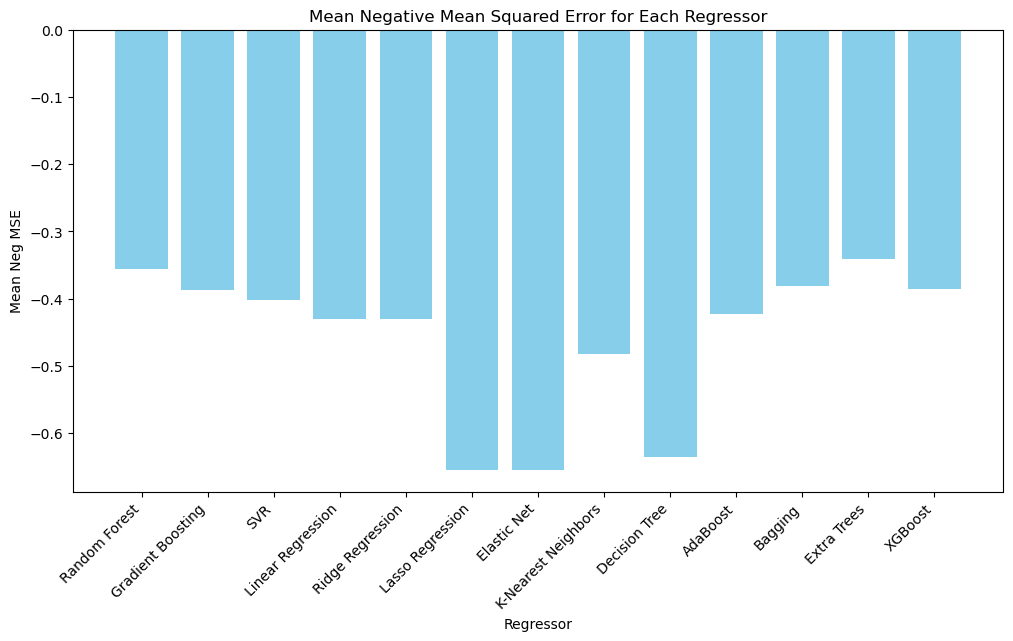

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train and y_train are your training data
# Replace these variable names with your actual training sets

# Create a pipeline with a standard scaler and multiple regressors
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('regressor', None)             # Step 2: Regressor (to be defined later)
])

# Define a list of regressors to try
regressors = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('SVR', SVR()),
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Elastic Net', ElasticNet()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Bagging', BaggingRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('XGBoost', XGBRegressor())
]

# Store results in a dictionary
results = {'Regressor': [], 'Mean Neg MSE': []}

# Evaluate each regressor using cross-validation
for reg_name, reg in regressors:
    # Set the regressor in the pipeline
    pipeline.set_params(regressor=reg)
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Store results
    results['Regressor'].append(reg_name)
    results['Mean Neg MSE'].append(cv_scores.mean())

    # Display results
    print(f'{reg_name}:')
    print(f'Cross-Validation Scores (Neg MSE): {cv_scores}')
    print(f'Mean Neg MSE: {cv_scores.mean():.4f}\n')

# Convert results to a DataFrame for easy plotting
import pandas as pd
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(results_df['Regressor'], results_df['Mean Neg MSE'], color='skyblue')
plt.title('Mean Negative Mean Squared Error for Each Regressor')
plt.xlabel('Regressor')
plt.ylabel('Mean Neg MSE')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline with the best-performing regressor (Extra Trees)
best_regressor = ExtraTreesRegressor()

# Create a pipeline with a standard scaler and Extra Trees regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Step 1: StandardScaler
    ('regressor', best_regressor)       # Step 2: Extra Trees Regressor
])

# Define the hyperparameters to search over
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f'Test Set Score: {test_score:.4f}')

C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
149 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estim

Best Hyperparameters: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Test Set Score: 0.5171


In [4]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'D:/Python_e/wine_quality/best_extra_trees_model_wine_quality_regression.joblib')

['D:/Python_e/wine_quality/best_extra_trees_model_wine_quality_regression.joblib']